In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [5]:
tip_df=sns.load_dataset('tips')

In [6]:
tip_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
sns.set_theme()

# histogram

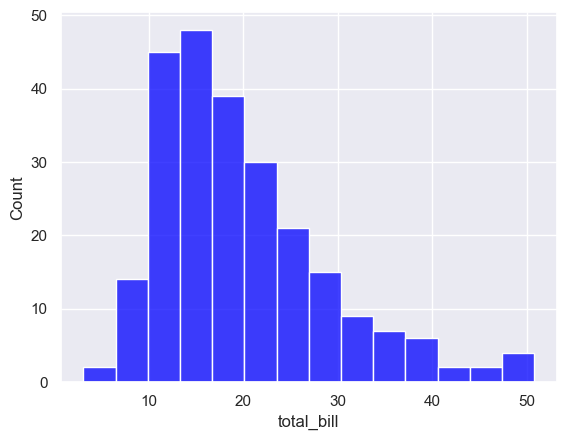

In [30]:
sns.histplot(data=tip_df["total_bill"],color='blue'); 

In [31]:
tip_df["total_bill"].value_counts().sort_values(ascending= False)

13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: total_bill, Length: 229, dtype: int64

# KDE

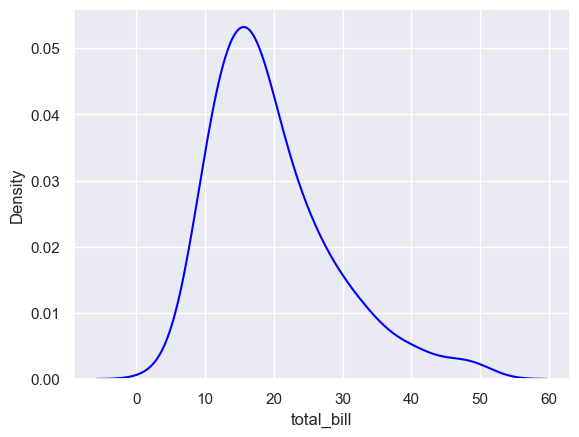

In [32]:
sns.kdeplot(data=tip_df["total_bill"],color='blue');

# Displot

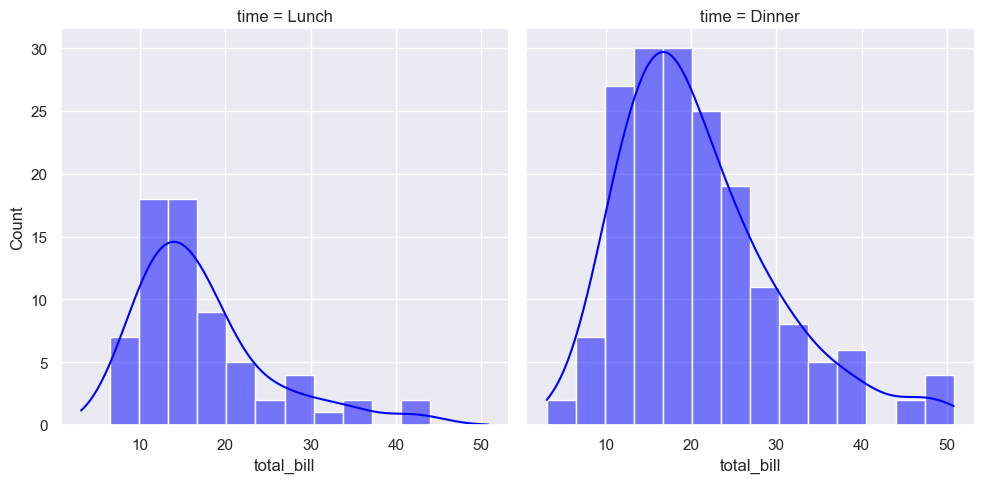

In [33]:
sns.displot(data=tip_df,x="total_bill",col="time",kde = True,color = 'blue');

# Bar plot

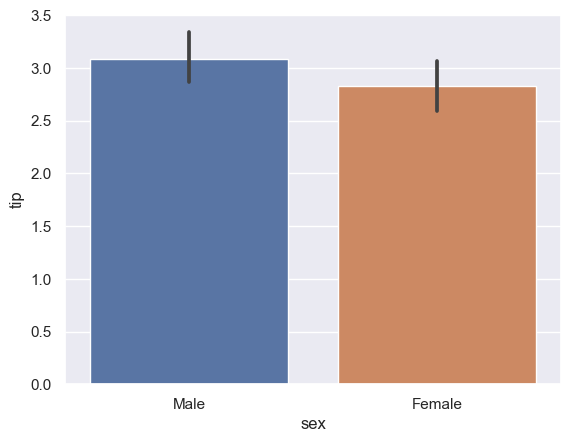

In [39]:
sns.barplot(data=tip_df,x="sex",y="tip",estimator=np.mean);

# Count plot

In [41]:
tip_df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

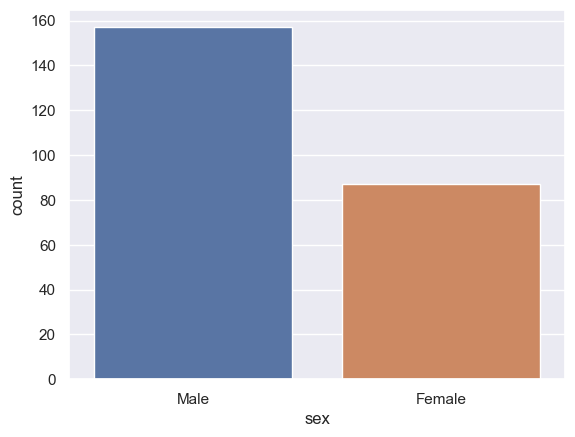

In [46]:
sns.countplot(data=tip_df,x = "sex");

# Box plot

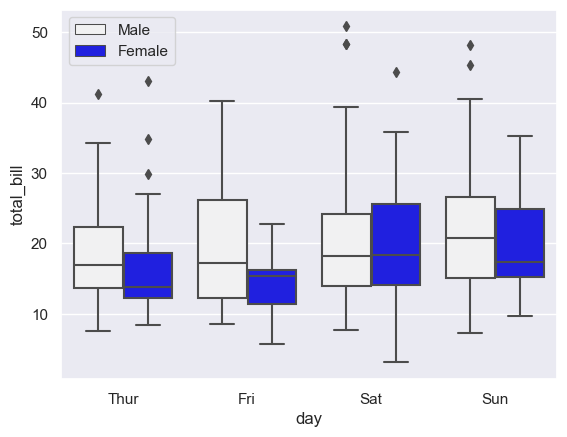

In [77]:
sns.boxplot(data=tip_df,x="day", y="total_bill", hue='sex', color ='blue')
plt.legend(loc=0);

# Facet grid

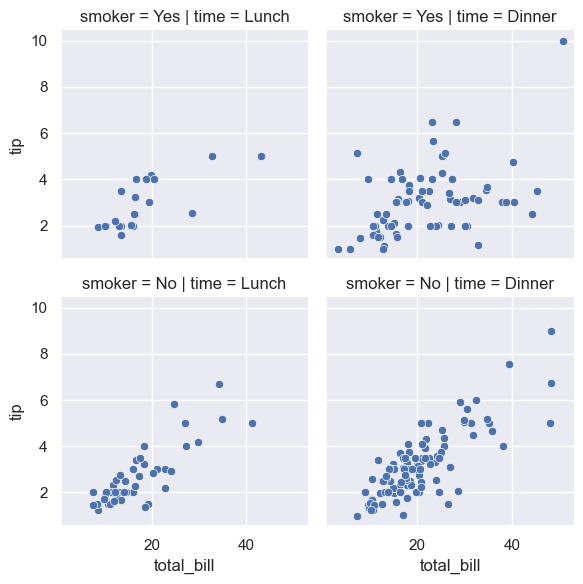

In [76]:
tip_fg=sns.FacetGrid(data = tip_df,row="smoker",col="time")
tip_fg.map(sns.scatterplot , "total_bill","tip");

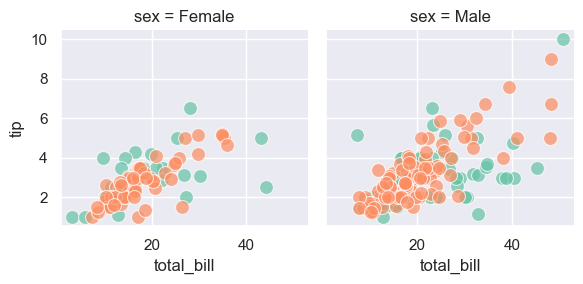

In [87]:
kws= dict(s=100,alpha = 0.7)

new_fg=sns.FacetGrid(data = tip_df,hue="smoker",col="sex", col_order=["Female","Male"],palette ="Set2")
new_fg.map(sns.scatterplot , "total_bill","tip", **kws);

# joint plot 

In [89]:
pen_df=sns.load_dataset('penguins')

In [90]:
pen_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


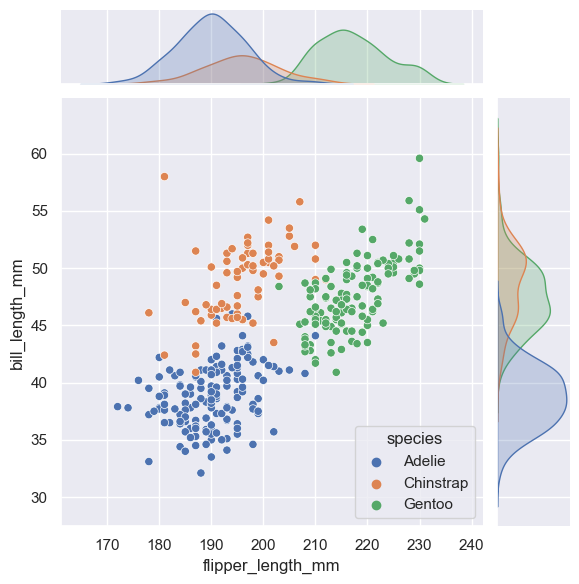

In [94]:
sns.jointplot(data=pen_df,x="flipper_length_mm",y = "bill_length_mm", hue="species");

# Pair plot

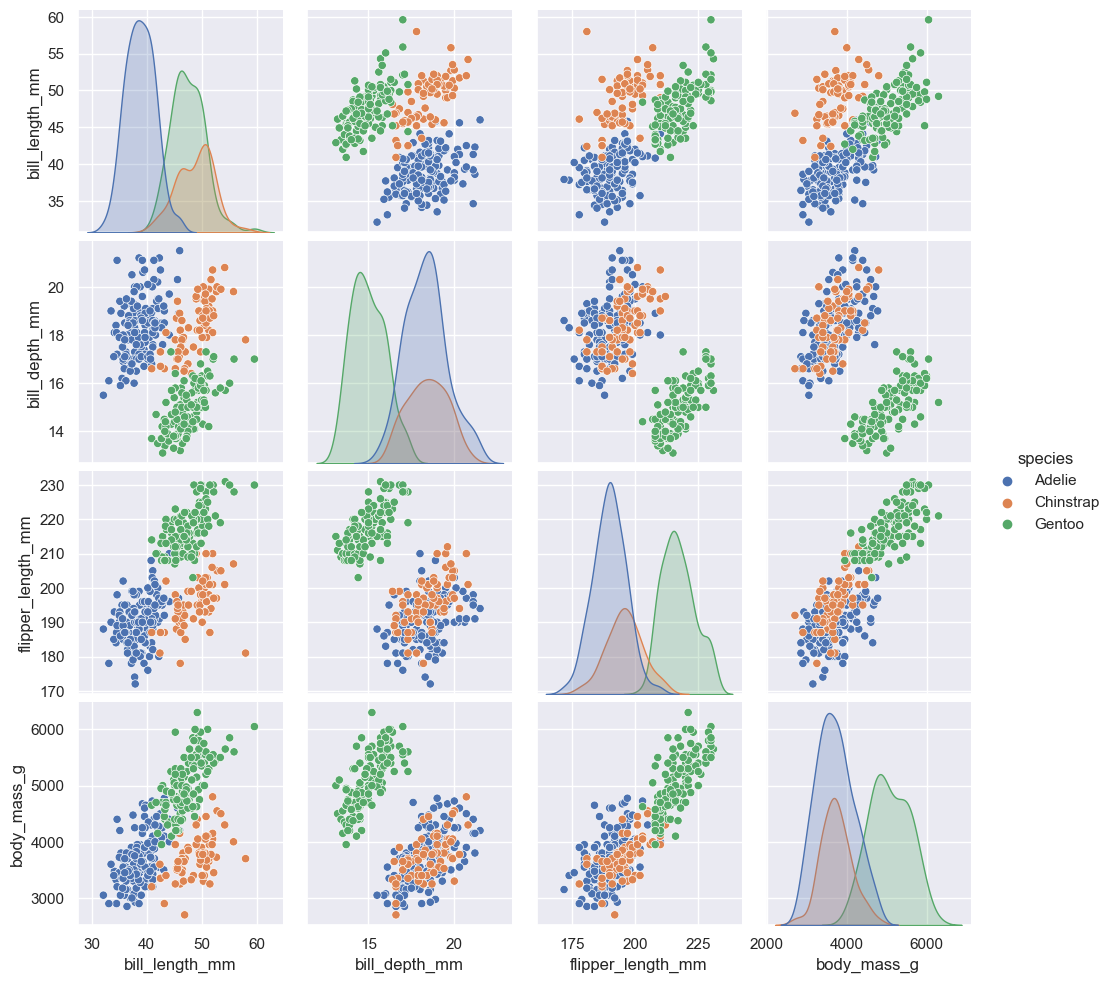

In [96]:
sns.pairplot(data=pen_df,hue='species');

# Heat map

In [101]:
fl_df = sns.load_dataset('flights')

In [102]:
fl_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [104]:
flights=pd.pivot_table(fl_df,index='month', columns='year', values='passengers')

In [106]:
flights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


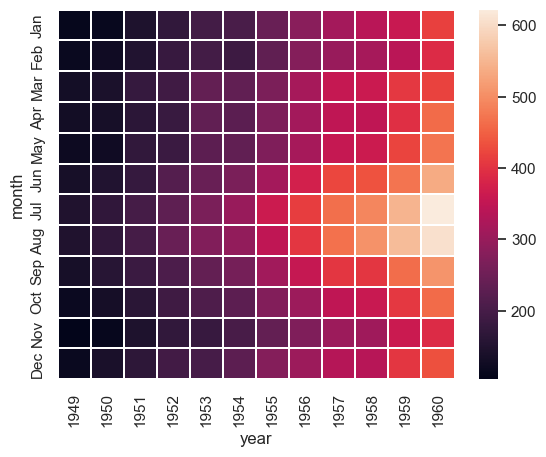

In [146]:
sns.heatmap(data=flights,linecolor = 'white',linewidths = 0.1);